# Based on https://inria.github.io/scikit-learn-mooc/index.html#

In [32]:
import pandas as pd

adult_census = pd.read_csv("adult-census.csv")

adult_census.head(10)

,ID,age,workclass,fnlwgt:,education:,education-num:,marital-status:,occupation:,relationship:,race:,sex:,capital-gain:,capital-loss:,hours-per-week:,native-country:,class
0,1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,6,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,7,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,8,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,9,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,10,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
# to display nice model diagram
from sklearn import set_config
set_config(display='diagram')

In [33]:
target_name = "class"
target = adult_census[target_name]
data = adult_census.drop(columns=target_name)
data.columns

Index(['ID', 'age', 'workclass', 'fnlwgt:', 'education:', 'education-num:',
       'marital-status:', 'occupation:', 'relationship:', 'race:', 'sex:',
       'capital-gain:', 'capital-loss:', 'hours-per-week:', 'native-country:'],
      dtype='object')

In [63]:
numerical_columns = ['age','capital-loss:','hours-per-week:']
data_numeric = data[numerical_columns]

In [64]:
data_numeric

,age,capital-loss:,hours-per-week:
0,39,0,40
1,50,0,13
2,38,0,40
3,53,0,40
4,28,0,40
...,...,...,...
32556,27,0,38
32557,40,0,40
32558,58,0,40
32559,22,0,20


In [65]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data_numeric, target, random_state=42)

In [66]:
data_train.describe()

,age,capital-loss:,hours-per-week:
count,24420.000000,24420.000000,24420.000000
mean,38.598116,88.957207,40.386568
std,13.638458,405.633599,12.299621
min,17.000000,0.000000,1.000000
25%,28.000000,0.000000,40.000000
50%,37.000000,0.000000,40.000000
75%,48.000000,0.000000,45.000000
max,90.000000,4356.000000,99.000000


In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data_train)

StandardScaler()

In [68]:
scaler.mean_

array([38.5981163 , 88.95720721, 40.38656839])

In [70]:
data_train_scaled = scaler.transform(data_train)
data_train_scaled

array([[ 0.76270329, -0.21930883, -0.03142994],
       [-0.85041534, -0.21930883,  0.37509498],
       [ 0.39608542, -0.21930883,  1.59466973],
       ...,
       [-1.51032751, -0.21930883, -1.65752961],
       [ 0.83602687, -0.21930883,  3.54598934],
       [-0.33715032, -0.21930883,  1.59466973]])

In [71]:
data_train_scaled = scaler.fit_transform(data_train)
data_train_scaled

array([[ 0.76270329, -0.21930883, -0.03142994],
       [-0.85041534, -0.21930883,  0.37509498],
       [ 0.39608542, -0.21930883,  1.59466973],
       ...,
       [-1.51032751, -0.21930883, -1.65752961],
       [ 0.83602687, -0.21930883,  3.54598934],
       [-0.33715032, -0.21930883,  1.59466973]])

In [72]:
data_train_scaled = pd.DataFrame(data_train_scaled,
                                 columns=data_train.columns)
data_train_scaled.describe()

,age,capital-loss:,hours-per-week:
count,2.442000e+04,2.442000e+04,2.442000e+04
mean,2.167708e-16,5.877544e-17,1.315173e-16
std,1.000020e+00,1.000020e+00,1.000020e+00
min,-1.583651e+00,-2.193088e-01,-3.202324e+00
25%,-7.770918e-01,-2.193088e-01,-3.142994e-02
50%,-1.171796e-01,-2.193088e-01,-3.142994e-02
75%,6.893797e-01,-2.193088e-01,3.750950e-01
max,3.768970e+00,1.051967e+01,4.765564e+00


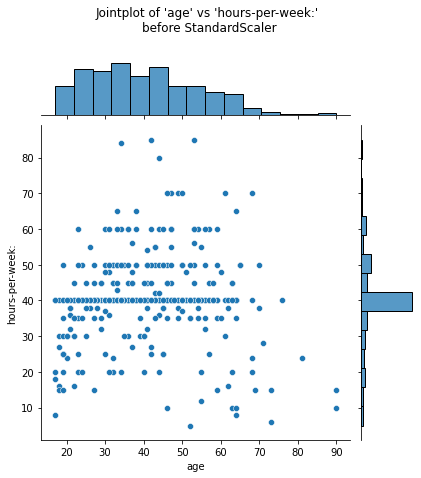

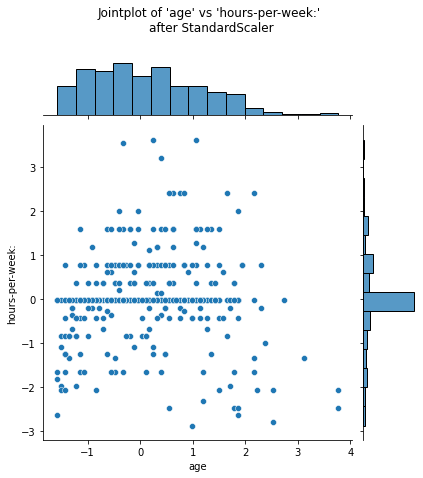

In [77]:
import matplotlib.pyplot  as plt
import seaborn as sns

# number of points to visualize to have a clearer plot
num_points_to_plot = 400

sns.jointplot(data=data_train[:num_points_to_plot], x="age",
              y="hours-per-week:", marginal_kws=dict(bins=15))
plt.suptitle("Jointplot of 'age' vs 'hours-per-week:' \nbefore StandardScaler", y=1.1)

sns.jointplot(data=data_train_scaled[:num_points_to_plot], x="age",
              y="hours-per-week:", marginal_kws=dict(bins=15))
_ = plt.suptitle("Jointplot of 'age' vs 'hours-per-week:' \nafter StandardScaler", y=1.1)

In [78]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), LogisticRegression())
model


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [79]:
model.named_steps

{'standardscaler': StandardScaler(),
 'logisticregression': LogisticRegression()}

In [85]:
start = time.time()
model.fit(data_train, target_train)
elapsed_time = time.time() - start
elapsed_time

0.04258322715759277

In [86]:
predicted_target = model.predict(data_test)
predicted_target[:5]

array(['<=50K', '<=50K', '<=50K', '<=50K', '<=50K'], dtype=object)

In [87]:
model_name = model.__class__.__name__
score = model.score(data_test, target_test)
print(f"The accuracy using a {model_name} is {score:.3f} "
      f"with a fitting time of {elapsed_time:.3f} seconds "
      f"in {model[-1].n_iter_[0]} iterations")

The accuracy using a Pipeline is 0.762 with a fitting time of 0.043 seconds in 7 iterations


In [89]:
from sklearn.model_selection import cross_validate

model = make_pipeline(StandardScaler(), LogisticRegression())
cv_result = cross_validate(model, data_numeric, target, cv=10)
cv_result


{'fit_time': array([0.04825592, 0.05875826, 0.05732369, 0.057482  , 0.05697608,
        0.06289482, 0.05654097, 0.05803895, 0.05804992, 0.05876374]),
 'score_time': array([0.00647116, 0.0066359 , 0.00706816, 0.00619292, 0.0062542 ,
        0.00646806, 0.00640297, 0.00618505, 0.00640607, 0.00644302]),
 'test_score': array([0.76205097, 0.76289926, 0.75890663, 0.76013514, 0.76320639,
        0.76351351, 0.75952088, 0.76412776, 0.76289926, 0.76689189])}

In [90]:
scores = cv_result["test_score"]
print(
    "The mean cross-validation accuracy is: "
    f"{scores.mean():.3f} +/- {scores.std():.3f}"
)

The mean cross-validation accuracy is: 0.762 +/- 0.002


# Pipelines: chaining pre-processors and estimators

In [93]:
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# create a pipeline object
pipe = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)

# load the iris dataset and split it into train and test sets
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# fit the whole pipeline
pipe.fit(X_train, y_train)


# we can now use it like any other estimator
accuracy_score(pipe.predict(X_test), y_test)

0.9736842105263158

In [97]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

X, y = make_regression(n_samples=1000, random_state=0)
lr = LinearRegression()

result = cross_validate(lr, X, y, cv = 10)
result['test_score']  # r_squared score is high because dataset is easy

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

# Automatic parameter searches

In [101]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# define the parameter space that will be searched over
param_distributions = {'n_estimators': randint(1, 5),
                       'max_depth': randint(5, 10)}

# now create a searchCV object and fit it to the data
search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=0),
                            n_iter=5,
                            param_distributions=param_distributions,
                            random_state=0)
search.fit(X_train, y_train)




print(search.best_params_)


# the search object now acts like a normal random forest estimator
# with max_depth=9 and n_estimators=4
search.score(X_test, y_test)

In [99]:
search.best_params_

{'max_depth': 9, 'n_estimators': 4}